<a href="https://colab.research.google.com/github/asgutierrt/Introduction_to_IA/blob/main/unsupervised/notebooks/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# run ONCE (only in Colab)
!git clone https://github.com/asgutierrt/Introduction_to_IA.git

Cloning into 'Introduction_to_IA'...
remote: Enumerating objects: 35567, done.
remote: Counting objects: 100% (1374/1374), done.
remote: Compressing objects: 100% (1134/1134), done.
remote: Total 35567 (delta 254), reused 1336 (delta 232), pack-reused 34193
Receiving objects: 100% (35567/35567), 146.39 MiB | 12.40 MiB/s, done.
Resolving deltas: 100% (22747/22747), done.


In [26]:
# import custom modules
import os
curr_path="/content/Introduction_to_IA/unsupervised/src"
os.chdir(curr_path)

from modules.load_data import load_data, covarianza_inversa, encode_array, save_results
from modules.distances import plot_distances, get_distance_matrix
from modules.cluster_algorithms import naive_boxes, naive, naive_kn
from modules.visualizations import plot_clusters, subplots

# custom visualization: Notebook only
import plotly.io as pio
pio.renderers.default='colab'

from os.path import join
filename = 'water_potability.txt'

# store info on report folder
fig_path= join('..','reports','figures')
results_path= join('..','reports','group_matrix')
filepath = join('..','data',filename)

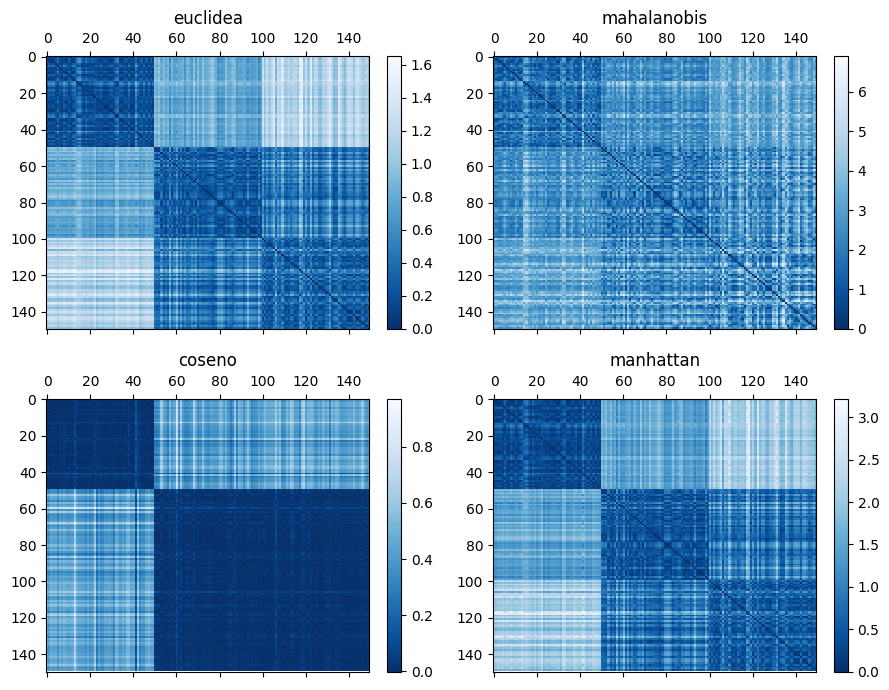

In [21]:
# load data
filepath='iris'
X, N, m = load_data(filepath)
cov_i = covarianza_inversa(X)

# calculate and plot distances
normas=['euclidea','mahalanobis','coseno','manhattan']
D = get_distance_matrix(X,X,cov_i,norms=normas)
plot_distances(D,normas,join(fig_path,'distances_XX.png'))

In [22]:
plot_dims=[0,1,2]
norma_i=0

In [32]:
# naive clustering: one per reference point
n_groups=3
G=naive(D,n_groups,norma_i)

## pick one reference point and encode its cluster
x_ref=0

## display the results
fig_name=join(fig_path,'just_naive_norm_%s.html'%normas[norma_i])
plot_clusters(X,encode_array(G[x_ref]),plot_dims,[x_ref],normas[norma_i],fig_name)

## save the results
save_results(encode_array(G[x_ref]),join(results_path,'just_naive_norm_%s.txt'%normas[norma_i]))

## visualize multiple classifications
x_references=[0,50,25]
fig_name=join(fig_path,'just_naive_x3_norm_%s.html'%normas[norma_i])
subplots(X,[encode_array(G[x]) for x in x_references],[0,1,2],
              [[x] for x in x_references],normas[norma_i],fig_name)

In [28]:
# naive clustering: boxes
n_groups=3

## create grouping matrix
G0, ref_points = naive_boxes(X,D,n_groups,norma_i)

## save the results
save_results(G0,join(results_path,'boxes_norm_%s.txt'%normas[norma_i]))

## display the results
fig_name=join(fig_path,'boxes_norm_%s.html'%normas[norma_i])
plot_clusters(X,G0,plot_dims,ref_points,normas[norma_i],fig_name)

In [29]:
# 2. naive clustering: k-nearest neighbors
k_n=50

## create grouping matrix
G0, ref_points = naive_kn(X,D,k_n,norma_i)

## save the results
save_results(G0,join(results_path,'kn_norm_%s.txt'%normas[norma_i]))

## display the results
fig_name=join(fig_path,'kn_norm_%s.html'%normas[norma_i])
plot_clusters(X,G0,plot_dims,ref_points,normas[norma_i],fig_name)